# AtliQ Grands Revenue Analysis in Hospitality domain

## Importing Packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

## Read Input Files

In [2]:
date = pd.read_csv(r"D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\Input Files\dim_date.csv")

In [3]:
hotels = pd.read_csv(r"D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\Input Files\dim_hotels.csv")

In [4]:
rooms = pd.read_csv(r"D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\Input Files\dim_rooms.csv")

In [5]:
agg_booking = pd.read_csv(r"D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\Input Files\fact_aggregated_bookings.csv")

In [6]:
booking = pd.read_csv(r"D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\Input Files\fact_bookings.csv")

## date data analysis

In [8]:
date.shape

(92, 4)

In [9]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [10]:
date_copy = date.copy()

###### Drop day_type column 

In [18]:
date_copy.drop('day_type',axis=1,inplace = True)

In [19]:
date_copy.head()

,date,mmm yy,week no
0,01-May-22,May 22,W 19
1,02-May-22,May 22,W 19
2,03-May-22,May 22,W 19
3,04-May-22,May 22,W 19
4,05-May-22,May 22,W 19


#### Checking for Null Data

In [20]:
miss = date_copy.isnull().sum()
miss_p = (date_copy.isnull().sum()/len(date_copy))*100
miss_data = pd.concat([miss,miss_p],axis = 1,keys = ['Total','%'])
print(miss_data)

         Total    %
date         0  0.0
mmm yy       0  0.0
week no      0  0.0


In [23]:
date_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     92 non-null     object
 1   mmm yy   92 non-null     object
 2   week no  92 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


In [33]:
#convert date column type to datetime
date_copy['date'] = pd.to_datetime(date_copy['date'],errors='coerce')

##### Creating new column wn 

In [64]:
date_copy['wn'] =date_copy['date'].dt.strftime("%U")
##starts from 0, Sunday is the first day of the week

In [68]:
date_copy['wn'] = pd.to_numeric(date_copy['wn'],errors='coerce').convert_dtypes()+1  
##As in python week number starts from 0, thats why we add extra 1 to 'wn' column

In [74]:
date_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     92 non-null     datetime64[ns]
 1   mmm yy   92 non-null     object        
 2   week no  92 non-null     object        
 3   wn       92 non-null     Int64         
dtypes: Int64(1), datetime64[ns](1), object(2)
memory usage: 3.1+ KB


In [69]:
date_copy.head(20)

,date,mmm yy,week no,wn
0,2022-05-01,May 22,W 19,19
1,2022-05-02,May 22,W 19,19
2,2022-05-03,May 22,W 19,19
3,2022-05-04,May 22,W 19,19
4,2022-05-05,May 22,W 19,19
5,2022-05-06,May 22,W 19,19
6,2022-05-07,May 22,W 19,19
7,2022-05-08,May 22,W 20,20
8,2022-05-09,May 22,W 20,20
9,2022-05-10,May 22,W 20,20


##### Creating new column day type (Here Friday and Saturday are described as Weekend) 

In [82]:
date_copy['day type'] = np.where(pd.to_numeric(date_copy['date'].dt.strftime("%w"))>4,'Weekend','Weekday')
# %w returns 0 to 6, where 0 is Sunday and 6 is Saturday

In [83]:
date_copy.head(20)

,date,mmm yy,week no,wn,day type
0,2022-05-01,May 22,W 19,19,Weekday
1,2022-05-02,May 22,W 19,19,Weekday
2,2022-05-03,May 22,W 19,19,Weekday
3,2022-05-04,May 22,W 19,19,Weekday
4,2022-05-05,May 22,W 19,19,Weekday
5,2022-05-06,May 22,W 19,19,Weekend
6,2022-05-07,May 22,W 19,19,Weekend
7,2022-05-08,May 22,W 20,20,Weekday
8,2022-05-09,May 22,W 20,20,Weekday
9,2022-05-10,May 22,W 20,20,Weekday


#### Write date_copy data into a csv file 

In [86]:
date_copy.to_csv(r'D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\final_data\date.csv')

## hotels data analysis

In [88]:
hotels.shape

(25, 4)

In [90]:
hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


#### Checking for Null Data

In [91]:
hotels_copy=hotels.copy()

In [92]:
miss = hotels_copy.isnull().sum()
miss_p = (hotels_copy.isnull().sum()/len(hotels_copy))*100
miss_data = pd.concat([miss,miss_p],axis = 1,keys = ['Total','%'])
print(miss_data)

               Total    %
property_id        0  0.0
property_name      0  0.0
category           0  0.0
city               0  0.0


In [93]:
hotels_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [94]:
hotels_copy.groupby('city')['property_id'].count().sort_values(ascending=False)

city
Mumbai       8
Bangalore    6
Hyderabad    6
Delhi        5
Name: property_id, dtype: int64

[Text(0, 0, '8'), Text(0, 0, '6'), Text(0, 0, '6'), Text(0, 0, '5')]

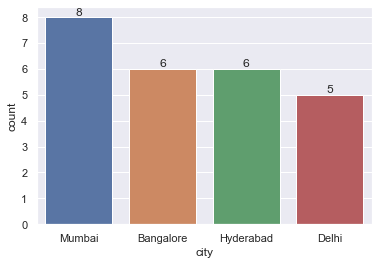

In [109]:
d=hotels_copy.groupby('city')['property_id'].count().sort_values(ascending=False).reset_index(name='count')
ct=sns.barplot(x=d['city'],y=d['count'],data=hotels_copy,ci=None)
ct.bar_label(ct.containers[0])

In [95]:
hotels_copy.groupby('category')['property_id'].count().sort_values(ascending=False)

category
Luxury      16
Business     9
Name: property_id, dtype: int64

[Text(0, 0, '16'), Text(0, 0, '9')]

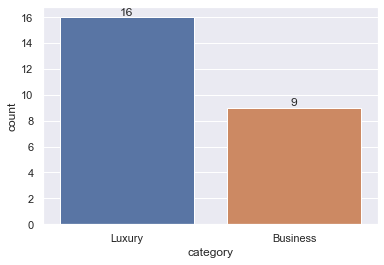

In [110]:
d=hotels_copy.groupby('category')['property_id'].count().sort_values(ascending=False).reset_index(name='count')
cat=sns.barplot(x=d['category'],y=d['count'],data=hotels_copy,ci=None)
cat.bar_label(cat.containers[0])

#### Write hotels_copy data into a csv file 

In [111]:
hotels_copy.to_csv(r'D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\final_data\hotels.csv')

## rooms data analysis

In [112]:
rooms.shape

(4, 2)

In [113]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [114]:
rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### Write rooms data into a csv file 

In [115]:
rooms.to_csv(r'D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\final_data\rooms.csv')

## agg_booking data analysis

In [117]:
agg_booking.shape

(9200, 5)

In [118]:
agg_booking.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
5,17560,01-May-22,RT1,28,40
6,19558,01-May-22,RT1,25,40
7,19560,01-May-22,RT1,23,26
8,17561,01-May-22,RT1,22,26
9,16560,01-May-22,RT1,24,34


In [119]:
agg_booking_copy=agg_booking.copy()

#### Checking for Null Data 

In [120]:
miss = agg_booking_copy.isnull().sum()
miss_p = (agg_booking_copy.isnull().sum()/len(agg_booking_copy))*100
miss_data = pd.concat([miss,miss_p],axis = 1,keys = ['Total','%'])
print(miss_data)

                     Total    %
property_id              0  0.0
check_in_date            0  0.0
room_category            0  0.0
successful_bookings      0  0.0
capacity                 0  0.0


In [121]:
agg_booking_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [122]:
#convert check_in_date column type to datetime
agg_booking_copy['check_in_date'] = pd.to_datetime(agg_booking_copy['check_in_date'],errors='coerce')

In [123]:
agg_booking_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 359.5+ KB


<AxesSubplot:>

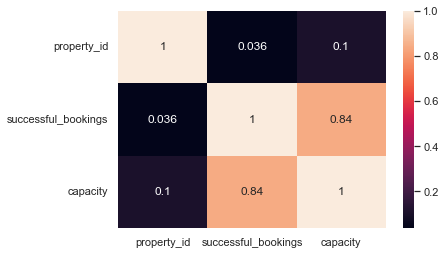

In [124]:
sns.heatmap(agg_booking_copy.corr(),annot=True)

##### Checking for duplicate value 

In [125]:
agg_booking_copy.duplicated().sum()

0

### Creating metrices 

In [128]:
Total_capacity = agg_booking_copy['capacity'].sum()
print("Total Capacity = ",Total_capacity)

Total Capacity =  232576


In [130]:
Total_successful_book = agg_booking_copy['successful_bookings'].sum()
print("Total Successful Bookings = ",Total_successful_book)

Total Successful Bookings =  134590


In [134]:
occupancy_p = round((Total_successful_book/Total_capacity)*100,2)
print("Occupancy % = ",occupancy_p,"%")

Occupancy % =  57.87 %


In [143]:
min_date = min(date_copy['date'])
max_date = max(date_copy['date'])
nod = max_date - min_date
nod = nod.days + 1
print(min_date)
print(max_date)
print("No. of days = ",nod)

2022-05-01 00:00:00
2022-07-31 00:00:00
No. of days =  92


In [144]:
DSRN = Total_capacity/nod
print("DSRN = ",DSRN) 

DSRN =  2528.0


In [149]:
#checking for number of unique property_id matches or not with hotels_copy data
agg_booking_copy['property_id'].value_counts().count()

25

In [150]:
#checking for number of check_in_date matches or not with date_copy data
agg_booking_copy['check_in_date'].value_counts().count()

92

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '16558'),
  Text(1, 0, '16559'),
  Text(2, 0, '16560'),
  Text(3, 0, '16561'),
  Text(4, 0, '16562'),
  Text(5, 0, '16563'),
  Text(6, 0, '17558'),
  Text(7, 0, '17559'),
  Text(8, 0, '17560'),
  Text(9, 0, '17561'),
  Text(10, 0, '17562'),
  Text(11, 0, '17563'),
  Text(12, 0, '17564'),
  Text(13, 0, '18558'),
  Text(14, 0, '18559'),
  Text(15, 0, '18560'),
  Text(16, 0, '18561'),
  Text(17, 0, '18562'),
  Text(18, 0, '18563'),
  Text(19, 0, '19558'),
  Text(20, 0, '19559'),
  Text(21, 0, '19560'),
  Text(22, 0, '19561'),
  Text(23, 0, '19562'),
  Text(24, 0, '19563')])

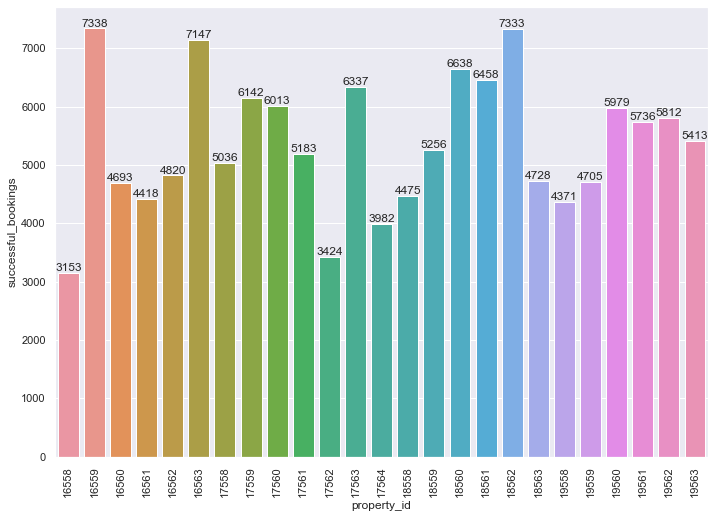

In [207]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=agg_booking_copy.groupby('property_id')['successful_bookings'].sum().sort_values(ascending=False).reset_index(name='successful_bookings')
pprt=sns.barplot(x=d['property_id'],y=d['successful_bookings'],data=agg_booking_copy)
pprt.bar_label(pprt.containers[0])
plt.xticks(rotation=90)

(array([19113., 19127., 19144., 19158., 19174., 19188., 19205.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

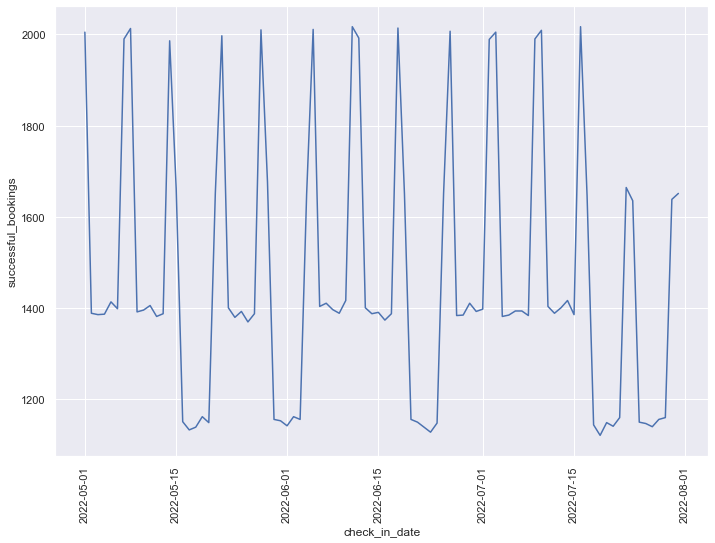

In [208]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=agg_booking_copy.groupby('check_in_date')['successful_bookings'].sum().sort_values(ascending=False).reset_index(name='successful_bookings')
dp=sns.lineplot(x=d['check_in_date'],y=d['successful_bookings'],data=agg_booking_copy)
plt.xticks(rotation=90)

#### Write agg_booking_copy data into a csv file 

In [160]:
agg_booking_copy.to_csv(r'D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\final_data\agg_booking.csv')

## booking data analysis 

In [161]:
booking.shape

(134590, 12)

In [162]:
booking_copy = booking.copy()

In [163]:
booking_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [164]:
booking_copy.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,2022-05-01,2022-05-01,2022-05-03,2,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,2022-04-28,2022-05-01,2022-05-06,2,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,2022-04-26,2022-05-01,2022-05-03,2,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,2022-04-28,2022-05-01,2022-05-02,1,RT1,others,4.0,Checked Out,9100,9100


#### Checking for Null Data 

In [206]:
miss = booking_copy.isnull().sum()
miss_p = (booking_copy.isnull().sum()/len(booking_copy))*100
miss_data = pd.concat([miss,miss_p],axis = 1,keys = ['Total','%'])
print(miss_data)

                   Total          %
booking_id             0   0.000000
property_id            0   0.000000
booking_date           0   0.000000
check_in_date          0   0.000000
checkout_date          0   0.000000
no_guests              0   0.000000
room_category          0   0.000000
booking_platform       0   0.000000
ratings_given      77907  57.884687
booking_status         0   0.000000
revenue_generated      0   0.000000
revenue_realized       0   0.000000


As Some property rating have not given, thats why in that place are remain null which is shown as NaN

##### Checking for duplicate value  

In [166]:
booking_copy.duplicated().sum()

0

<AxesSubplot:>

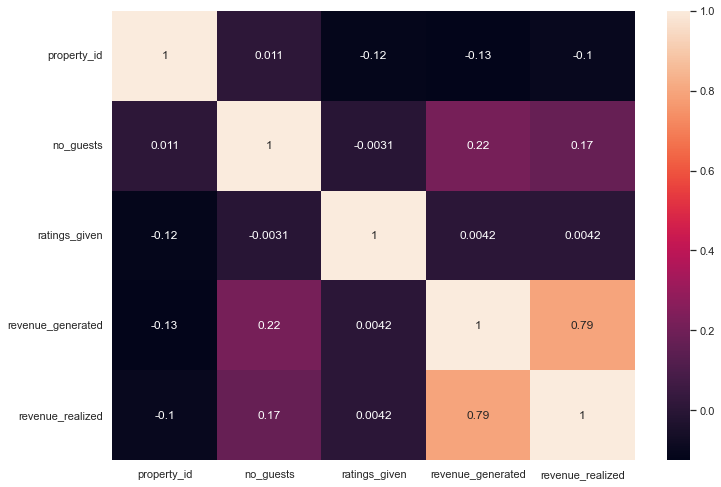

In [167]:
sns.heatmap(booking_copy.corr(),annot=True)

In [168]:
#checking for number of unique property_id matches or not with hotels_copy data
booking_copy['property_id'].value_counts().count()

25

In [169]:
#checking for number of check_in_date matches or not with date_copy data
booking_copy['check_in_date'].value_counts().count()

92

In [170]:
booking_copy['booking_date'].value_counts().count()

116

In [171]:
booking_copy.groupby('booking_platform')['booking_date'].count().sort_values(ascending=False)

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_date, dtype: int64

[Text(0, 0, '55066'),
 Text(0, 0, '26898'),
 Text(0, 0, '14756'),
 Text(0, 0, '13379'),
 Text(0, 0, '9630'),
 Text(0, 0, '8106'),
 Text(0, 0, '6755')]

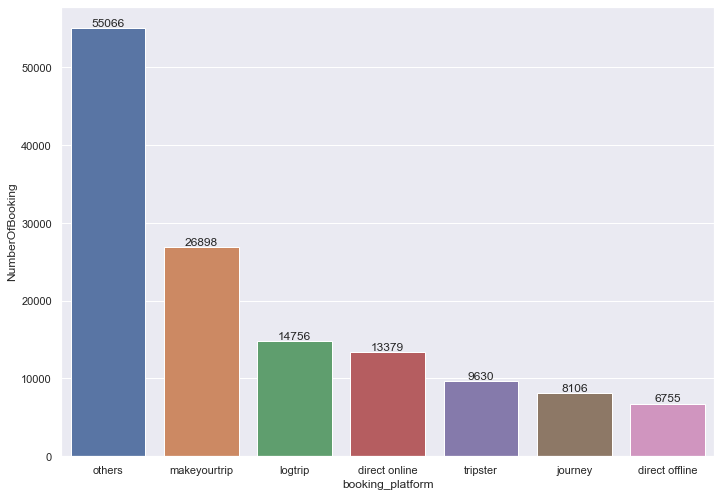

In [209]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=booking_copy.groupby('booking_platform')['booking_date'].count().sort_values(ascending=False).reset_index(name='NumberOfBooking')
pt=sns.barplot(x=d['booking_platform'],y=d['NumberOfBooking'],data=booking_copy)
pt.bar_label(pt.containers[0])
#plt.xticks(rotation=90)

In [173]:
booking_copy.groupby('booking_status')['booking_date'].count().sort_values(ascending=False)

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: booking_date, dtype: int64

[Text(0, 0, '94411'), Text(0, 0, '33420'), Text(0, 0, '6759')]

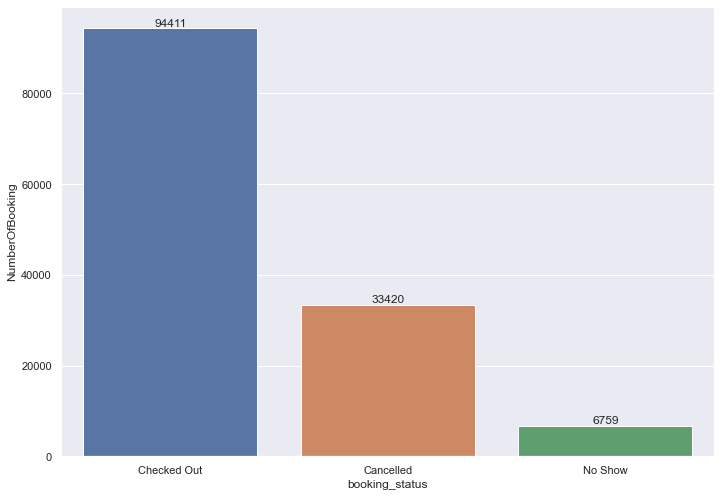

In [210]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=booking_copy.groupby('booking_status')['booking_date'].count().sort_values(ascending=False).reset_index(name='NumberOfBooking')
st=sns.barplot(x=d['booking_status'],y=d['NumberOfBooking'],data=booking_copy)
st.bar_label(st.containers[0])
#plt.xticks(rotation=90)

[Text(0, 0, '49505'),
 Text(0, 0, '38446'),
 Text(0, 0, '30566'),
 Text(0, 0, '16073')]

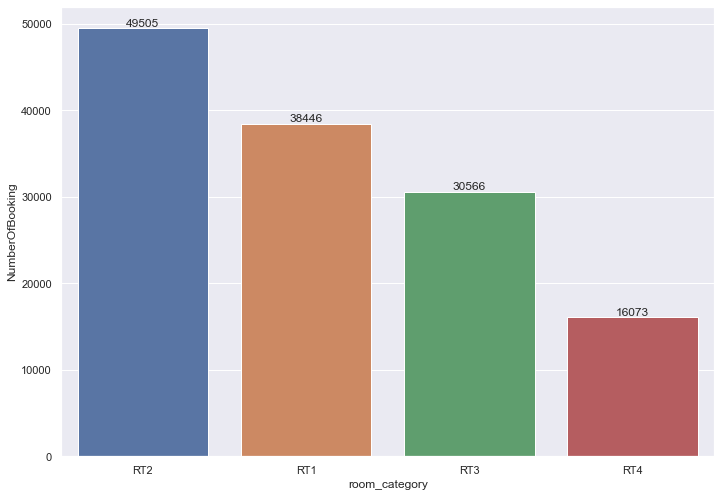

In [211]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
d=booking_copy.groupby('room_category')['booking_date'].count().sort_values(ascending=False).reset_index(name='NumberOfBooking')
rt=sns.barplot(x=d['room_category'],y=d['NumberOfBooking'],data=booking_copy)
rt.bar_label(rt.containers[0])
#plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

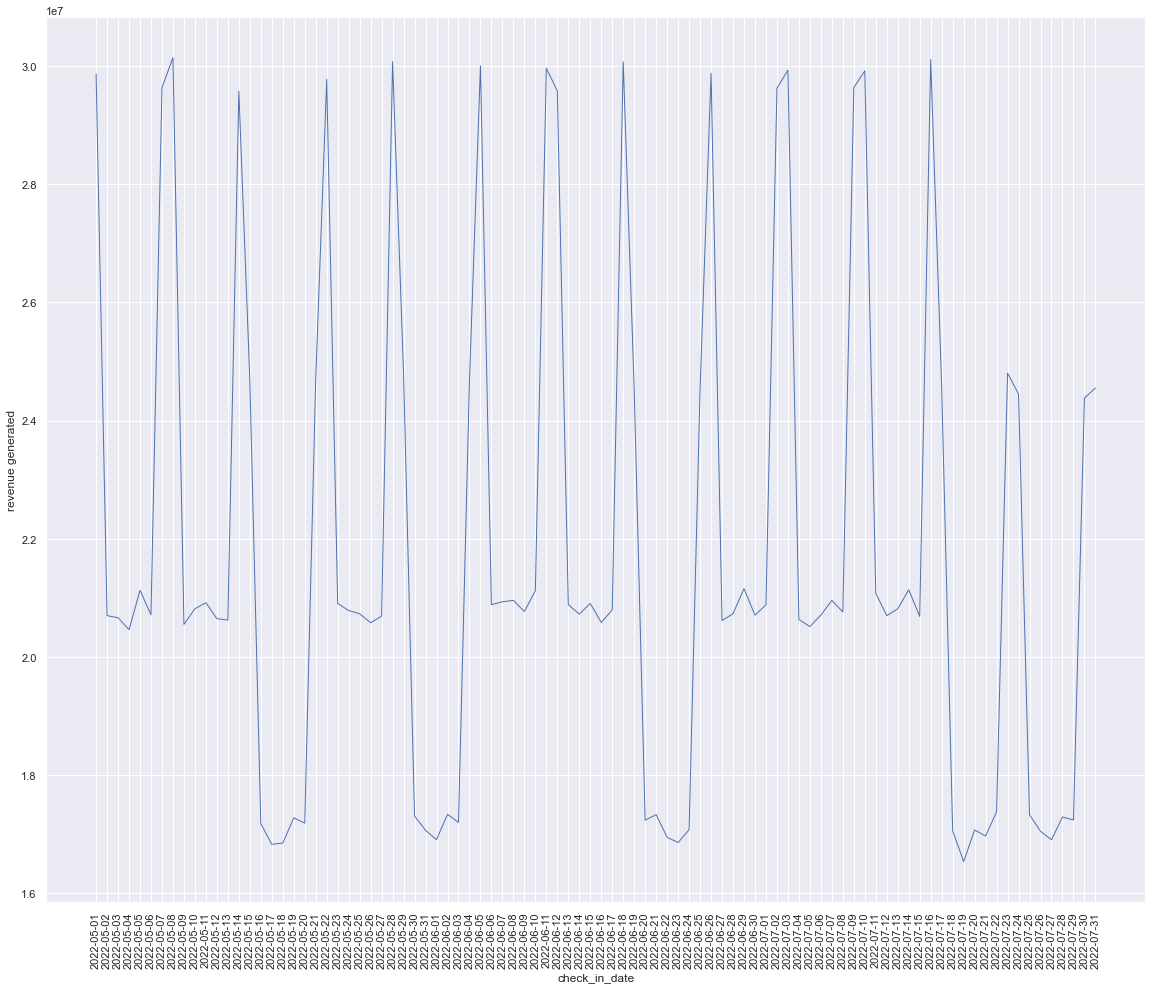

In [186]:
sns.set(rc={'figure.figsize':(19.7,16.27)})
d=booking_copy.groupby('check_in_date')['revenue_generated'].sum().reset_index(name='revenue generated')
dp=sns.lineplot(x=d['check_in_date'],y=d['revenue generated'],data=booking_copy,sort=False,lw=1)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

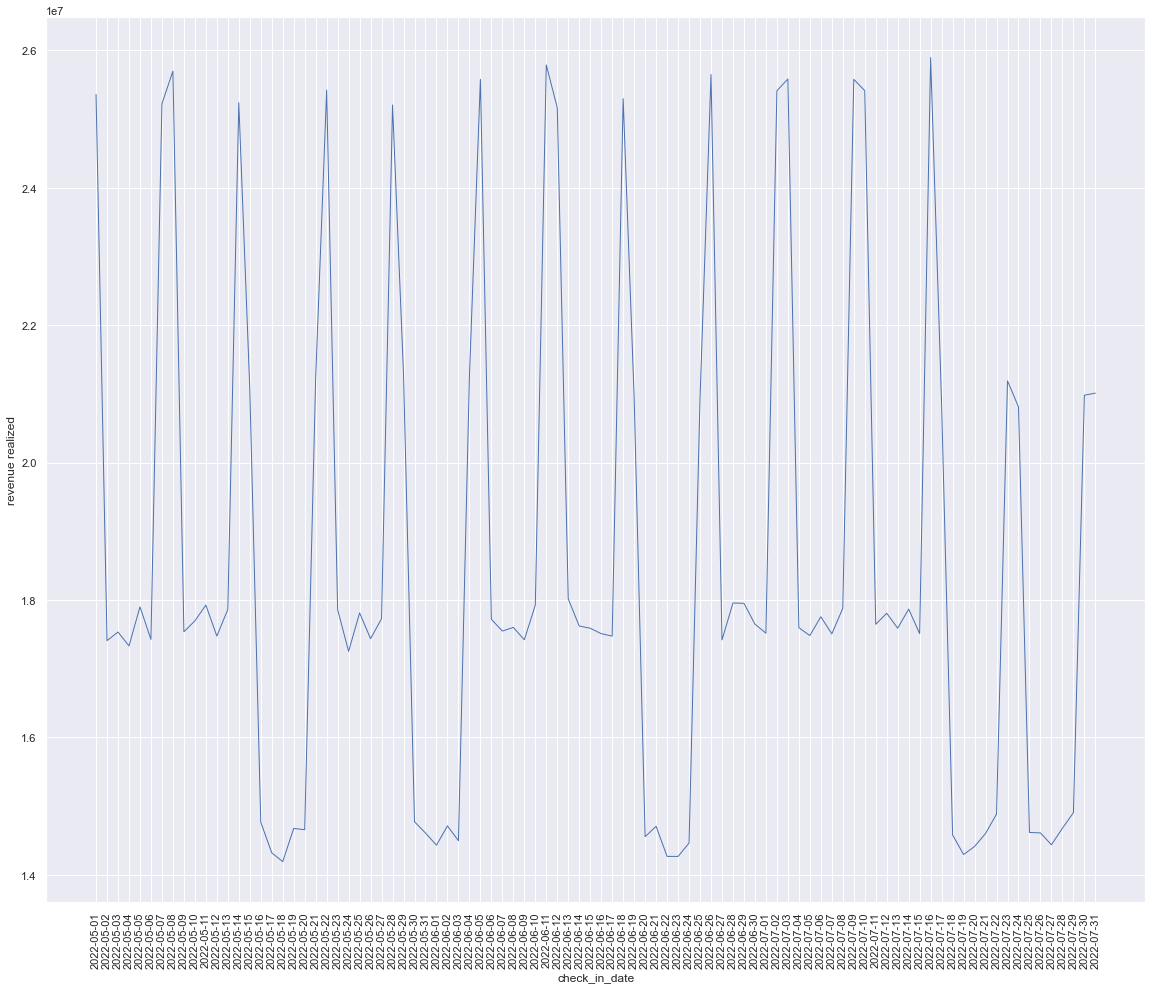

In [187]:
sns.set(rc={'figure.figsize':(19.7,16.27)})
d=booking_copy.groupby('check_in_date')['revenue_realized'].sum().reset_index(name='revenue realized')
dp=sns.lineplot(x=d['check_in_date'],y=d['revenue realized'],data=booking_copy,sort=False,lw=1)
plt.xticks(rotation=90)

### Creating metrices  

In [188]:
Revenue = booking_copy['revenue_realized'].sum()
print("Revenue = ",Revenue)

Revenue =  1708771229


In [190]:
Total_bookings = booking_copy['booking_id'].count()
print("Total Bookings = ",Total_bookings)

Total Bookings =  134590


In [193]:
average_rating=round(booking_copy.loc[booking_copy['ratings_given'].notnull(),'ratings_given'].mean(),2)
print("Average Rating = ",average_rating)

Average Rating =  3.62


In [194]:
cancelled_book = booking_copy.loc[booking_copy['booking_status']=='Cancelled','booking_id'].count()
print("Total Cancelled Booking = ",cancelled_book)

Total Cancelled Booking =  33420


In [195]:
checkout_book = booking_copy.loc[booking_copy['booking_status']=='Checked Out','booking_id'].count()
print("Total checkout Booking = ",checkout_book)

Total checkout Booking =  94411


In [196]:
noshow_book = booking_copy.loc[booking_copy['booking_status']=='No Show','booking_id'].count()
print("Total No Show Booking = ",noshow_book)

Total No Show Booking =  6759


In [197]:
cancelled_p = round((cancelled_book/Total_bookings)*100,2)
print("Cancellation % = ",cancelled_p,"%")

Cancellation % =  24.83 %


In [198]:
noshow_p = round((noshow_book/Total_bookings)*100,2)
print("No show rate % = ",noshow_p,"%")

No show rate % =  5.02 %


In [200]:
ADR = round((Revenue/Total_bookings),2)
print("ADR = ",ADR)

ADR =  12696.12


In [201]:
realize_p = 100-(cancelled_p+noshow_p)
print("Realisation % = ",realize_p,"%")

Realisation % =  70.15 %


In [202]:
RevPAR = round((Revenue/Total_capacity),2)
print("RevPAR = ",RevPAR)

RevPAR =  7347.15


In [203]:
DBRN = round((Total_bookings/nod),2)
print("DBRN = ",DBRN)

DBRN =  1462.93


In [204]:
DURN = round((checkout_book/nod),2)
print("DURN = ",DURN)

DURN =  1026.21


#### Write booking_copy data into a csv file 

In [205]:
booking_copy.to_csv(r'D:\technical skill studies\data analysis\project\Codebasic Project\Project-1(Hospitality Domain)\final_data\booking.csv')